<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [22]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [23]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

Shape of the original image: (100, 100, 3)
Shape of Single Channel image: (100, 100)


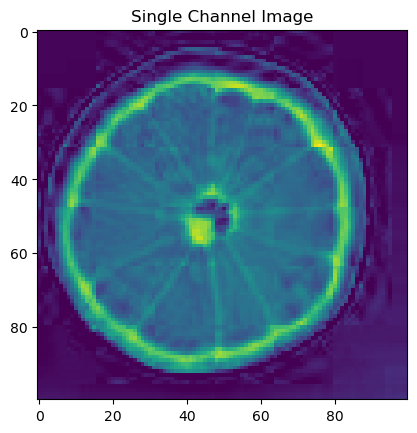

In [27]:
#printing the image
print("Shape of the original image:", image.shape)
#Create a new variable called img_single_channel that is equivalent to the last color channel of image
img_single_channel = image[:, :, -1]
print("Shape of Single Channel image:", img_single_channel.shape)
# Using plt.imshow to plot img_single_channel
plt.imshow(img_single_channel)
plt.title("Single Channel Image")
plt.show()

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of img_average_channel: (100, 100)


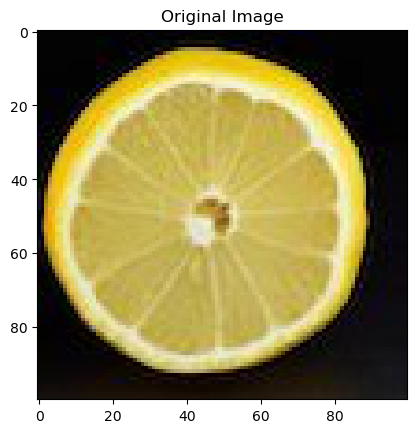

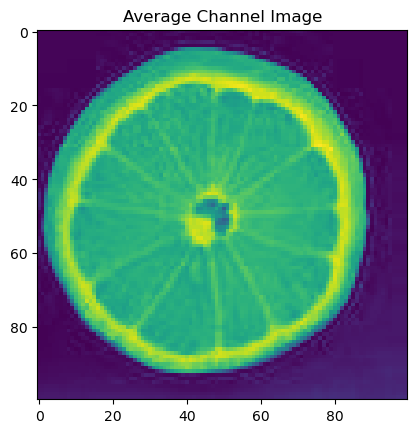

In [28]:
#Creating a variable img_average_channel that is equivalent to the average of all three color channels of image
img_average_channel = np.mean(image, axis=2)
print("Shape of img_average_channel:", img_average_channel.shape)

#plotting original image
plt.imshow(image)
plt.title("Original Image")
plt.show()
#plotting average image
plt.imshow(img_average_channel)
plt.title("Average Channel Image")
plt.show()

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

**Identity Matrix** : An identity matrix, also known as a unit matrix where all the diagonal elements are 1 and 
remaining elements are 0. When any matrix is multiplied with the identity matrix, the result will be the same matrix.

In [29]:
# Assuming square matrix
size = img_average_channel.shape[0]  
identity_matrix = np.eye(size)

# Considering a Random row from the Identity matrix 
random_row_index = np.random.randint(0, size)
random_row = identity_matrix[random_row_index]

print("Identity Matrix:")
print(identity_matrix)
print("\nRandom Row:")
print(random_row)

Identity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Random Row:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [30]:
num_rows = img_average_channel.shape[0]
# An array containing the numbers 0 to N-1 , where N is the number of Rows
rows = np.arange(num_rows)
# Shuffling the indices
np.random.shuffle(rows)
# Printing the shuffled rows
print("Shuffled Rows:", rows)

Shuffled Rows: [83 79 85 12 63 15 87 73 62 48 69 11 52 33 49  4 21  6 20 43 55 26 24 77
 34 54  0 27 46 30  9 92 60 35 25 51 56 31 65 10 53 82 97 16 74 28 98 76
 95 57 84 41 36 17 81 39 29 18  8 93 58 64 50 61 14 80 86 91 90 37 40 42
  7 59 44 75 32 68 96 99 67 47  3 22 23 38 78  1  5 19  2 70 88 94 89 45
 13 66 72 71]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [31]:
num_rows = img_single_channel.shape[0]
identity_matrix = np.eye(num_rows)
# Use the array of random row indices to create matrix T from identity_matrix
T = identity_matrix[rows]
print("Shape of T:", T.shape)



Shape of T: (100, 100)


**T** is actually rearranging the rows of the identity matrix.It provides a specific ordering that allows us to apply and then reverse the transformation accurately.

In [32]:
# Reshape T if necessary to have the same size as identity_matrix and img_average_channel
if T.shape != identity_matrix.shape or T.shape != img_average_channel.shape:
    T = T.reshape(identity_matrix.shape)

# Print the shape of T after potential reshaping
print("Shape of T after reshaping:", T.shape)

Shape of T after reshaping: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


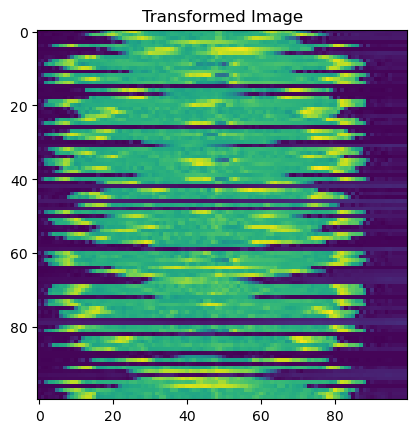

In [33]:
transformed_image = np.dot(T, img_average_channel)

# Checking the shape of the result
print("Shape of transformed_image:", transformed_image.shape)
import matplotlib.pyplot as plt

# Ploting the transformed image
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()


**Task 2**:
**Pattern Observed** : The image appears as a scrambled version of the original image where the rows are scrambeld and mixing of image content.

**Dot product** : Each dot product in the matrix multiplication between T and img_average_channel is a row-wise 
transformation. it shuffles the rows of the image data, changing the order in which they appear.

**Transformation** : The transformation is like this rearrangement, it changes the order of elements.
Imagine if the rows of an image represented different sections or features. The transformation would mix up these sections,
creating a scrambled version of the original image.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

**Task 1** : If a matrix is invertible, then its determinant must be non-zero, So I am checking the determinant of the matrix.

Matrix T is invertible.


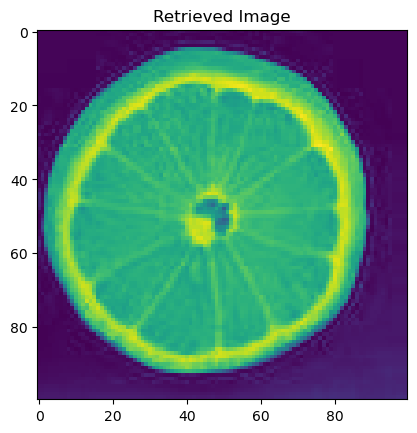

In [34]:
det_T = np.linalg.det(T)
#checking if T is invertable or not 
if det_T != 0:
    print("Matrix T is invertible.")
    Tinv = np.linalg.inv(T)
else:
    print("Matrix T is not invertible.")
    

retrieved_image = np.dot(Tinv, transformed_image)

# Plot the retrieved image
plt.imshow(retrieved_image)
plt.title("Retrieved Image")
plt.show()


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


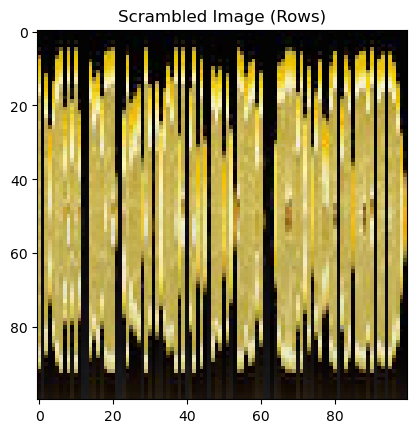

In [35]:
# Creating a numpy array that contains the numbers 0, 1, ..., N where N is the number of rows and columns in the image.
num_rows = image.shape[0]
num_columns = image.shape[1]

columns = np.arange(num_columns)

# Shuffling the indices for rows only
np.random.shuffle(columns)

# Creating the scrambling matrix for rows
T_columns = np.eye(num_columns)[columns]

# Apply T_rows to each color channel separately
scrambled_columns_image = np.zeros_like(image)

# As each pixel is represented as a combination of three color channels: red, green, and blue
# so we are running the loop with range 3

for i in range(3):    
    channel = image[:, :, i]
    scrambled_channel = np.dot(channel, T_columns)
    scrambled_columns_image[:, :, i] = scrambled_channel

# Plotting the partially scrambled image with only rows scrambled
plt.imshow(scrambled_columns_image.astype('uint8'))
plt.title("Scrambled Image (Rows)")
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

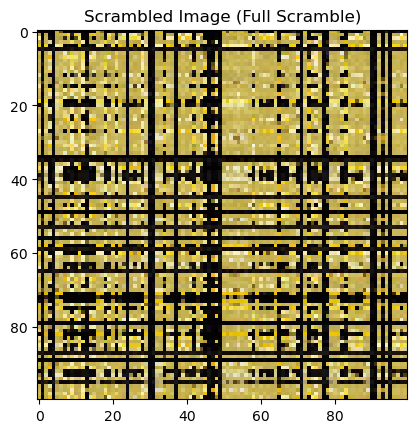

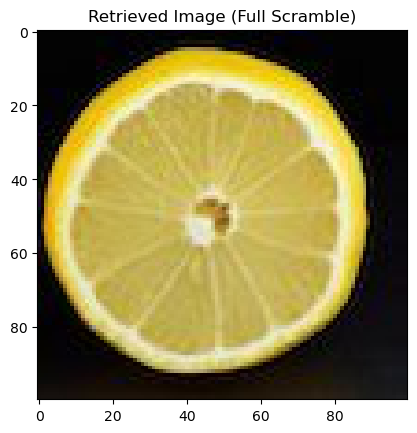

In [21]:

# Apply T_rows and T_columns to each color channel separately for full scramble
scrambled_image_full = np.zeros_like(image)

for i in range(3):    
    channel = image[:,:,i]
    scrambled_channel = np.dot(np.dot(T_rows, channel), T_columns.T)
    scrambled_image_full[:,:,i] = scrambled_channel

# Plotting the fully scrambled image with both rows and columns scrambled
plt.imshow(scrambled_image_full.astype('uint8'))
plt.title("Scrambled Image (Full Scramble)")
plt.show()

# Inverting the operations to recover the original image

# Computing the inverse
Tinv_rows = np.linalg.inv(T_rows)
Tinv_columns = np.linalg.inv(T_columns)

# Applying the inverse operations to each color channel separately
retrieved_image = np.zeros_like(image)

for i in range(3):
    scrambled_channel = scrambled_image_full[:,:,i]
    retrieved_channel = np.dot(np.dot(Tinv_rows, scrambled_channel), Tinv_columns.T)
    retrieved_image[:,:,i] = retrieved_channel

# Finally, plotting the retrieved image
plt.imshow(retrieved_image.astype('uint8'))
plt.title("Retrieved Image (Full Scramble)")
plt.show()
